In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import scipy.optimize

from pytres import nnls
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
base_dir = 'example_data//KD74-TCE/'

data_full = pd.read_csv(f'{base_dir}/TRES.txt', sep='\t', header=None)
time_full = data_full[0].values
data_full = data_full.drop(columns=[0]).values
irf = pd.read_csv(f'{base_dir}/IRF.txt', sep='\t', names=['time', 'val'])['val'].values

In [4]:
solver = nnls.TresSolverNNLS(data_full, time_full, irf, n_components=3, wavelength_slice=slice(10, None), time_slice=slice(1050, 6200))

In [5]:
tres_annot = solver.solve()

Findind IRF shift...
Elapsed time: 4.87s
	IRF_shift: -0.02124

Solving TRES...
Elapsed time: 9.85s
	message: Optimization terminated successfully.
	nit: 70
	fun: 353965.37776629714
	x: [2.52075155 5.60770121 0.6549753 ]


(0.9970883798723296, 0.004747133318883388, True)
(6250, 79)
(8.4, 49.6)


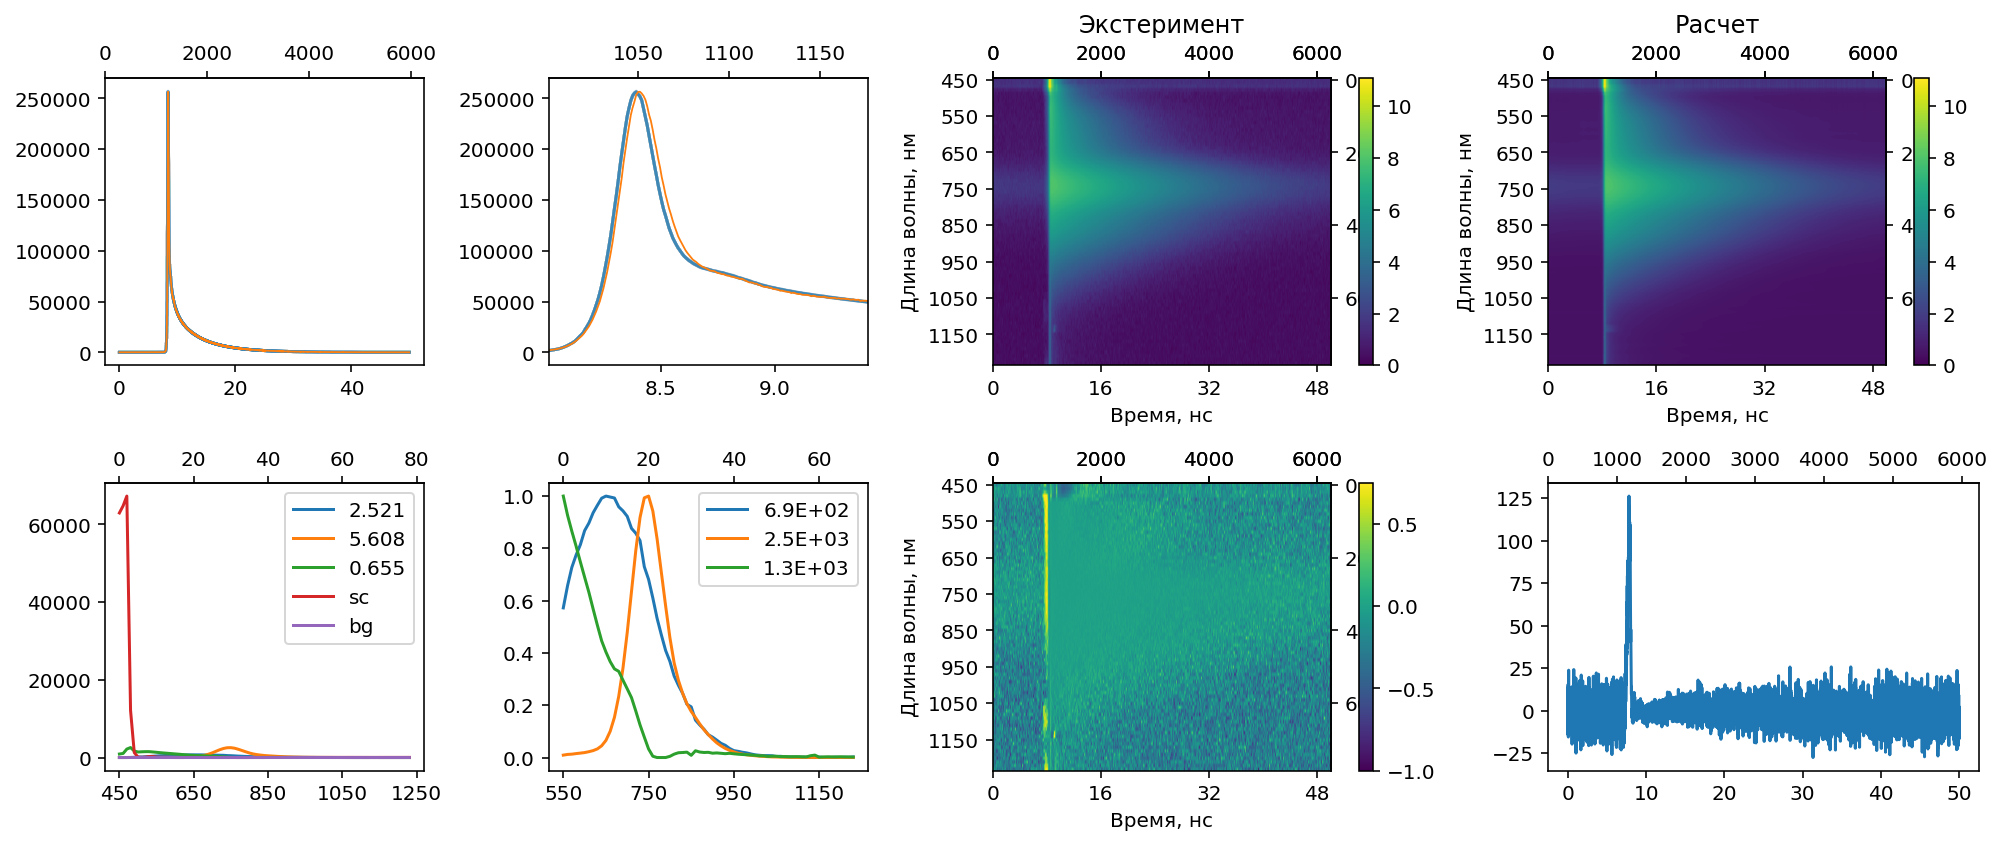

In [6]:
tres_annot.plot_summary()

In [7]:
pt, init = solver.compute_confidence_indervals(random=False)

[0.27023643 0.15096795 0.10067415]


  0%|          | 0/404 [00:00<?, ?it/s]

Lifetimes CI:
2.563 +/- 0.371
5.620 +/- 0.176
0.661 +/- 0.122
